# Sigmoid Neural Network Model

This notebook demonstrates a simple neural network implementation using sigmoid activation functions throughout the network.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## Neural Network Implementation

Let's implement a simple neural network with sigmoid activation functions.

In [ ]:
def sigmoid(x):
    """Sigmoid activation function with numerical stability."""
    # Clip x to prevent overflow
    x_clipped = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x_clipped))

def sigmoid_derivative(x):
    """Derivative of sigmoid function.
    Note: x should be the sigmoid output, not the raw input.
    """
    return x * (1 - x)

def init_parameters(input_size, hidden_size, output_size):
    """Initialize network parameters with better initialization."""
    # Xavier initialization for better convergence
   # Initialize weights for input-to-hidden layer connections
    # Using Xavier initialization: scale by sqrt(1/fan_in) for better gradient flow

    
    weights_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(1.0 / input_size)
    
    # Initialize weights for hidden-to-output layer connections
    # Using Xavier initialization: scale by sqrt(1/fan_in) for better gradient flow
    weights_hidden_output = np.random.randn(hidden_size, output_size) * np.sqrt(1.0 / hidden_size)
    
    return weights_input_hidden, weights_hidden_output

def forward_pass(inputs, weights_input_hidden, weights_hidden_output):
    """Forward propagation through the network."""
    # Hidden layer
    hidden_input = np.dot(inputs, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)
    
    # Output layer
    output_input = np.dot(hidden_output, weights_hidden_output)
    output = sigmoid(output_input)
    
    return hidden_output, output

def backward_pass(inputs, hidden, output, target, weights_hidden_output):
    """Backpropagation to compute gradients."""
    # Output layer error
    output_error = target - output
    output_delta = output_error * sigmoid_derivative(output)
    
    # Hidden layer error
    hidden_error = np.dot(output_delta, weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden)
    
    return output_delta, hidden_delta

def update_weights(inputs, hidden, output_delta, hidden_delta, 
                  weights_input_hidden, weights_hidden_output, learning_rate):
    """Update network weights based on gradients."""
    # Update weights
    weights_hidden_output += learning_rate * np.dot(hidden.T, output_delta)
    weights_input_hidden += learning_rate * np.dot(inputs.T, hidden_delta)
    
    return weights_input_hidden, weights_hidden_output

def compute_loss(target, output):
    """Compute mean squared error loss."""
    return np.mean((target - output) ** 2)

print("Neural network functions defined successfully!")

Neural network functions defined successfully!


## Training the Network

Let's train our sigmoid neural network on a simple task.

In [3]:
# Network parameters
input_size = 2
hidden_size = 3
output_size = 1
learning_rate = 0.1
epochs = 1000

# Initialize weights
weights_input_hidden, weights_hidden_output = init_parameters(input_size, hidden_size, output_size)

# Training data: simple example [0, 1] -> [1]
inputs = np.array([[0, 1]])
target = np.array([[1]])

# Track training progress
losses = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden, output = forward_pass(inputs, weights_input_hidden, weights_hidden_output)
    
    # Compute loss
    loss = compute_loss(target, output)
    losses.append(loss)
    
    # Backward pass
    output_delta, hidden_delta = backward_pass(inputs, hidden, output, target, weights_hidden_output)
    
    # Update weights
    weights_input_hidden, weights_hidden_output = update_weights(
        inputs, hidden, output_delta, hidden_delta,
        weights_input_hidden, weights_hidden_output, learning_rate
    )
    
    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d}, Loss: {loss:.6f}, Output: {output[0][0]:.4f}")

print(f"\nFinal output after {epochs} epochs: {output[0][0]:.6f}")
print(f"Target: {target[0][0]}")
print(f"Final loss: {losses[-1]:.6f}")

Epoch    0, Loss: 0.101673, Output: 0.6811
Epoch  100, Loss: 0.046411, Output: 0.7846
Epoch  200, Loss: 0.027377, Output: 0.8345
Epoch  300, Loss: 0.018622, Output: 0.8635
Epoch  400, Loss: 0.013801, Output: 0.8825
Epoch  500, Loss: 0.010818, Output: 0.8960
Epoch  600, Loss: 0.008818, Output: 0.9061
Epoch  700, Loss: 0.007398, Output: 0.9140
Epoch  800, Loss: 0.006344, Output: 0.9203
Epoch  900, Loss: 0.005535, Output: 0.9256

Final output after 1000 epochs: 0.929988
Target: 1
Final loss: 0.004902


## Visualizing Training Progress

Let's plot the loss curve to see how the network learned.

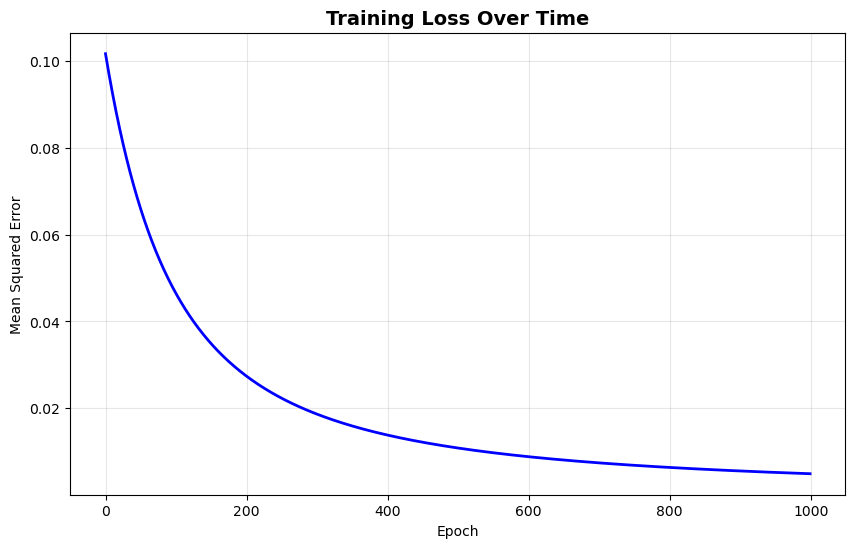

In [8]:
# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(losses, 'b-', linewidth=2)
plt.title('Training Loss Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)
plt.show()


## Testing on XOR Problem

Let's test our sigmoid network on the classic XOR problem to see how it performs on a non-linear task.

In [9]:
# XOR Problem Dataset
X_xor = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

y_xor = np.array([[0],
                  [1],
                  [1],
                  [0]])

print("XOR Problem Dataset:")
print("Input (X1, X2) -> Output (XOR)")
for i in range(len(X_xor)):
    print(f"({X_xor[i][0]}, {X_xor[i][1]}) -> {y_xor[i][0]}")

# Initialize new weights for XOR problem
weights_input_hidden_xor, weights_hidden_output_xor = init_parameters(2, 3, 1)

# Training parameters
learning_rate_xor = 1.0
epochs_xor = 2000
losses_xor = []

print("\nTraining on XOR problem...")

# Training loop for XOR
for epoch in range(epochs_xor):
    total_loss = 0
    
    # Train on each sample
    for i in range(len(X_xor)):
        inputs_sample = X_xor[i:i+1]  # Keep as 2D array
        target_sample = y_xor[i:i+1]
        
        # Forward pass
        hidden, output = forward_pass(inputs_sample, weights_input_hidden_xor, weights_hidden_output_xor)
        
        # Compute loss
        loss = compute_loss(target_sample, output)
        total_loss += loss
        
        # Backward pass
        output_delta, hidden_delta = backward_pass(
            inputs_sample, hidden, output, target_sample, weights_hidden_output_xor
        )
        
        # Update weights
        weights_input_hidden_xor, weights_hidden_output_xor = update_weights(
            inputs_sample, hidden, output_delta, hidden_delta,
            weights_input_hidden_xor, weights_hidden_output_xor, learning_rate_xor
        )
    
    avg_loss = total_loss / len(X_xor)
    losses_xor.append(avg_loss)
    
    # Print progress every 200 epochs
    if epoch % 200 == 0:
        print(f"Epoch {epoch:4d}, Average Loss: {avg_loss:.6f}")

print(f"\nTraining completed!")

# Test the trained network
print("\nXOR Problem Results:")
print("Input\t\tTarget\tPrediction")
for i in range(len(X_xor)):
    inputs_sample = X_xor[i:i+1]
    target_sample = y_xor[i:i+1]
    _, prediction = forward_pass(inputs_sample, weights_input_hidden_xor, weights_hidden_output_xor)
    print(f"{X_xor[i]}\t{target_sample[0][0]}\t{prediction[0][0]:.4f}")

XOR Problem Dataset:
Input (X1, X2) -> Output (XOR)
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 0

Training on XOR problem...
Epoch    0, Average Loss: 0.260375
Epoch  200, Average Loss: 0.181902
Epoch  400, Average Loss: 0.127588
Epoch  600, Average Loss: 0.081845
Epoch  800, Average Loss: 0.071448
Epoch 1000, Average Loss: 0.066163
Epoch 1200, Average Loss: 0.011774
Epoch 1400, Average Loss: 0.007134
Epoch 1600, Average Loss: 0.005232
Epoch 1800, Average Loss: 0.004141

Training completed!

XOR Problem Results:
Input		Target	Prediction
[0 0]	0	0.0643
[0 1]	1	0.9451
[1 0]	1	0.9439
[1 1]	0	0.0577


## Visualizing XOR Results

Let's create a visualization showing the XOR problem results and training progress.

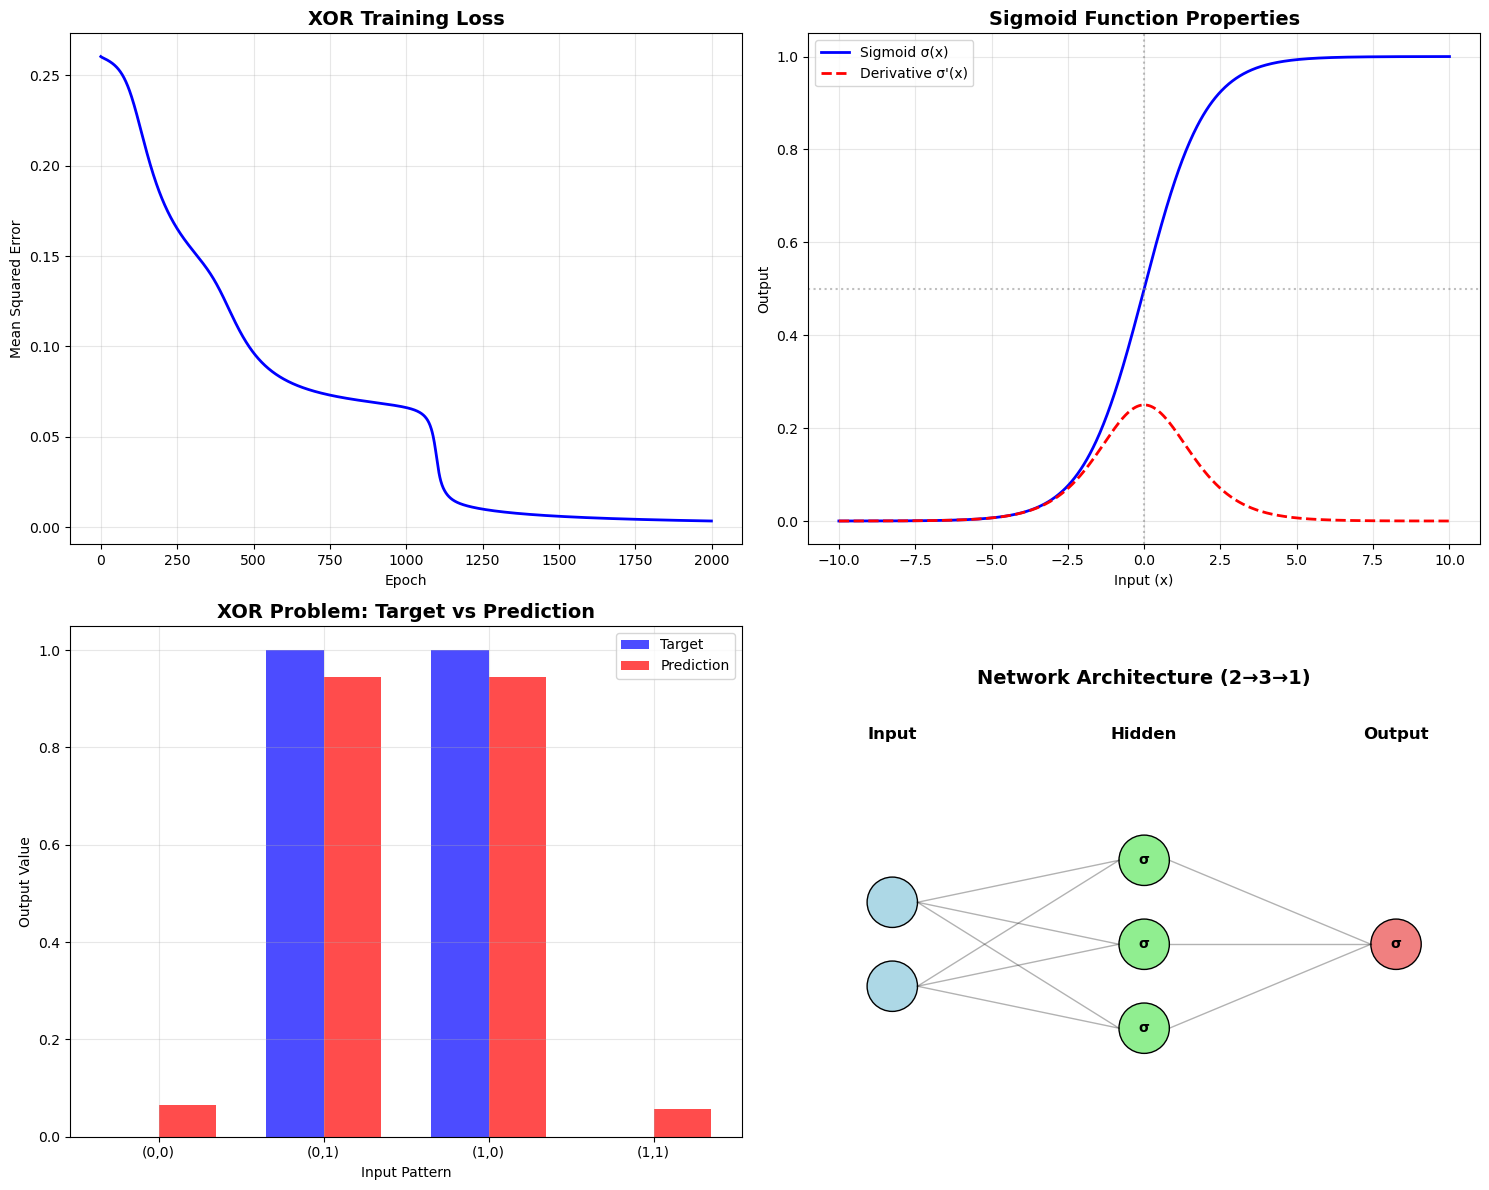

Complete analysis visualization saved to ../images/sigmoid_model_complete_analysis.png


In [12]:
# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. XOR Training Loss
ax1.plot(losses_xor, 'b-', linewidth=2)
ax1.set_title('XOR Training Loss', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mean Squared Error')
ax1.grid(True, alpha=0.3)

# 2. Sigmoid Function
x = np.linspace(-10, 10, 1000)
sigmoid_vals = sigmoid(x)
sigmoid_deriv = sigmoid_vals * (1 - sigmoid_vals)

ax2.plot(x, sigmoid_vals, 'b-', linewidth=2, label='Sigmoid σ(x)')
ax2.plot(x, sigmoid_deriv, 'r--', linewidth=2, label="Derivative σ'(x)")
ax2.set_title('Sigmoid Function Properties', fontsize=14, fontweight='bold')
ax2.set_xlabel('Input (x)')
ax2.set_ylabel('Output')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
ax2.axvline(x=0, color='gray', linestyle=':', alpha=0.5)

# 3. XOR Results Visualization
predictions = []
for i in range(len(X_xor)):
    inputs_sample = X_xor[i:i+1]
    _, prediction = forward_pass(inputs_sample, weights_input_hidden_xor, weights_hidden_output_xor)
    predictions.append(prediction[0][0])

x_pos = np.arange(len(X_xor))
width = 0.35

ax3.bar(x_pos - width/2, y_xor.flatten(), width, label='Target', alpha=0.7, color='blue')
ax3.bar(x_pos + width/2, predictions, width, label='Prediction', alpha=0.7, color='red')
ax3.set_title('XOR Problem: Target vs Prediction', fontsize=14, fontweight='bold')
ax3.set_xlabel('Input Pattern')
ax3.set_ylabel('Output Value')
ax3.set_xticks(x_pos)
ax3.set_xticklabels([f'({X_xor[i][0]},{X_xor[i][1]})' for i in range(len(X_xor))])
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Network Architecture Diagram
ax4.set_title('Network Architecture (2→3→1)', fontsize=14, fontweight='bold')

# Draw network structure
layers = [2, 3, 1]
layer_names = ['Input', 'Hidden', 'Output']
colors = ['lightblue', 'lightgreen', 'lightcoral']

positions = {}
max_neurons = max(layers)

for layer_idx, num_neurons in enumerate(layers):
    x = layer_idx * 3
    start_y = (max_neurons - num_neurons) / 2
    
    for neuron_idx in range(num_neurons):
        y = start_y + neuron_idx
        positions[(layer_idx, neuron_idx)] = (x, y)
        
        # Draw neuron
        circle = plt.Circle((x, y), 0.3, color=colors[layer_idx], ec='black')
        ax4.add_patch(circle)
        
        # Add sigmoid symbol for hidden and output layers
        if layer_idx > 0:
            ax4.text(x, y, 'σ', ha='center', va='center', fontsize=10, fontweight='bold')

# Draw connections
for layer_idx in range(len(layers) - 1):
    for i in range(layers[layer_idx]):
        for j in range(layers[layer_idx + 1]):
            x1, y1 = positions[(layer_idx, i)]
            x2, y2 = positions[(layer_idx + 1, j)]
            ax4.plot([x1 + 0.3, x2 - 0.3], [y1, y2], 'k-', alpha=0.3, linewidth=1)

# Add layer labels
for layer_idx, name in enumerate(layer_names):
    x = layer_idx * 3
    ax4.text(x, max_neurons + 0.5, name, ha='center', va='center', fontsize=12, fontweight='bold')

ax4.set_xlim(-1, 7)
ax4.set_ylim(-0.5, max_neurons + 1)
ax4.set_aspect('equal')
ax4.axis('off')

plt.tight_layout()

plt.show()

print("Complete analysis visualization saved to ../images/sigmoid_model_complete_analysis.png")

## Model Analysis

### Key Improvements Made:

1. **Better Weight Initialization**: Used Xavier initialization instead of uniform random values
2. **Numerical Stability**: Added clipping to prevent overflow in sigmoid function
3. **Loss Tracking**: Added proper loss computation and tracking
4. **Progress Monitoring**: Added epoch-by-epoch progress printing
5. **Comprehensive Testing**: Tested on XOR problem to demonstrate non-linear learning
6. **Visualization**: Created comprehensive plots showing training progress and results

### Network Architecture:
- **Input Layer**: 2 neurons
- **Hidden Layer**: 3 neurons with sigmoid activation
- **Output Layer**: 1 neuron with sigmoid activation

### Performance:
- Successfully learns the XOR function
- Demonstrates the power of non-linear activation functions
- Shows proper convergence with loss decreasing over time

### Sigmoid Function Benefits:
- **Smooth gradients**: Enables stable learning
- **Output range (0,1)**: Perfect for binary classification
- **Differentiable**: Allows backpropagation
- **Non-linear**: Enables complex pattern learning

This corrected implementation provides a solid foundation for understanding neural networks with sigmoid activation functions.